# Template Notebook

## Setup

### Standard library imports

In [1]:
%load_ext autoreload

In [2]:
import sys
import warnings
import logging

sys.path.append('..')
warnings.filterwarnings('ignore')
logger = logging.getLogger(__name__)

### Standard library imports

### Thrid Party libraries imports

In [3]:
import numpy as np
import seaborn as sns
import plotly.express as px
from matplotlib import pyplot as plt

### Modules imports

In [66]:
%autoreload 2

from source.operators.continuous import vectorized_crossover, vectorized_mutation
from source.operators.multiobjective import (
    assign_pareto_strength,
    collect_dominated_solutions,
    strength_binary_tournament_selection,
    strength_n_fittest_selection,
    strength_binary_tournament_selection,
    is_non_dominated_solution,
)
from source.spea_optimizer import SPEAOptimizer

### Paths

In [5]:
def schaffer_function(x):  # soruce: https://www.researchgate.net/publication/2446107_A_Multiobjective_Evolutionary_Algorithm_The_Study_Cases
    return [x**2, (x - 2)**2]

In [6]:
optimzier = SPEAOptimizer(schaffer_function, 1, "min")

In [ ]:
history = optimzier.optimize(
    num_epochs=10,
    population_size=100,
    crossover_rate=0.5,
    mutation_rate=0.4,
    selection_operator="n_fittest",
    reducing_period=1,
    search_range=((-10, 10),),
    mutation_strength=1,
    relative_mutation_strength=False,
    clustering_parameters={"max_iter": 50},
    silent=False,
    logging=True,
)

In [22]:
history.shape

(100, 1)

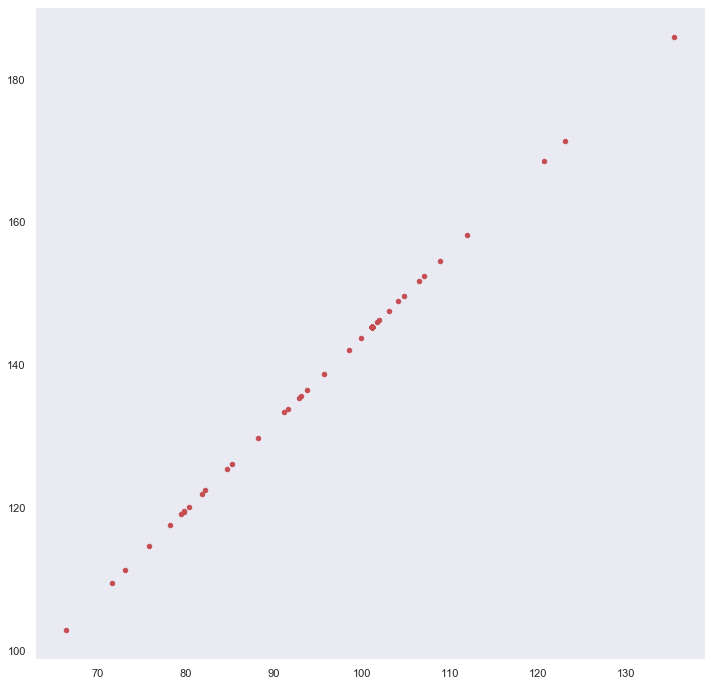

In [25]:
plt.figure(figsize=[12, 12])
sns.set()

values = np.apply_along_axis(schaffer_function, 0, history)
plt.scatter(values[0, :], values[1, :], c="r", s=20)

plt.grid()

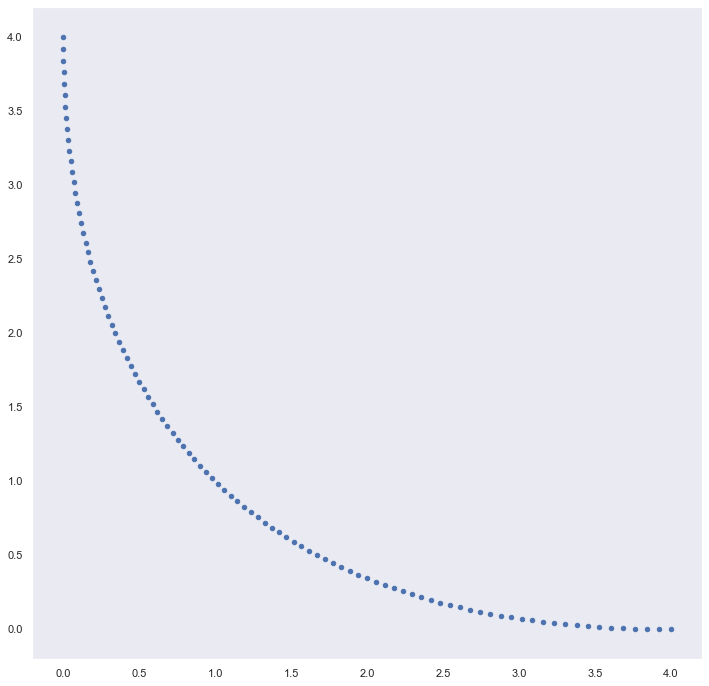

In [10]:
plt.figure(figsize=[12, 12])
sns.set()

t = np.linspace(0, 2, 100)
t_values = np.apply_along_axis(schaffer_function, 0, t)
plt.scatter(t_values[0, :], t_values[1, :], c="b", s=20)

plt.grid()

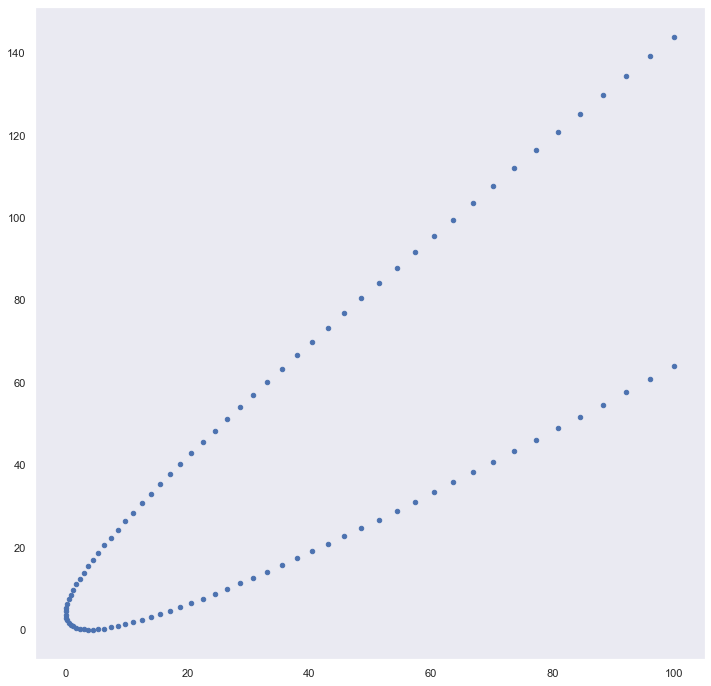

In [72]:
plt.figure(figsize=[12, 12])
sns.set()

t = np.linspace(-10, 10, 100)
t_values = np.apply_along_axis(schaffer_function, 0, t)
plt.scatter(t_values[0, :], t_values[1, :], c="b", s=20)

plt.grid()

In [ ]:
history = history.reshape(100, 100)

In [62]:
# selected = strength_n_fittest_selection(history, 50, mode="min")
selected = optimzier._collect_all_non_dominated_individuals(history)

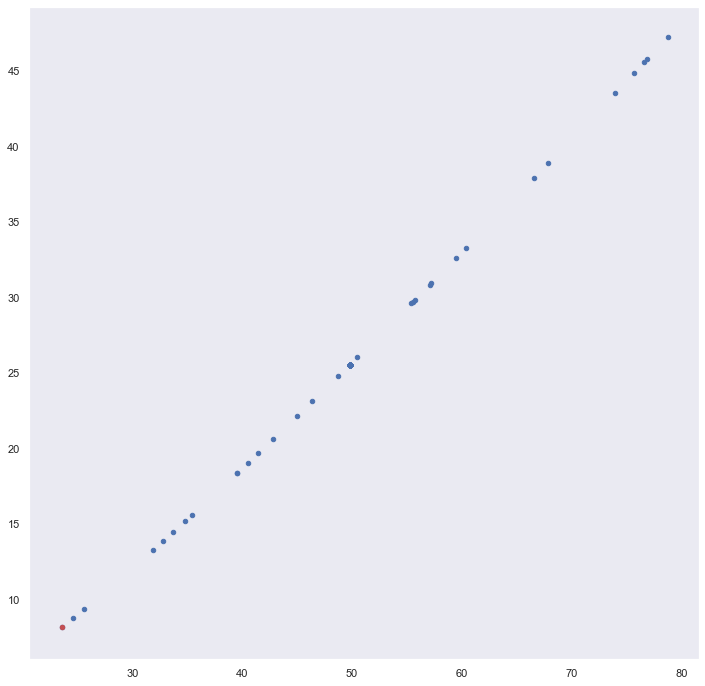

In [63]:
plt.figure(figsize=[12, 12])
sns.set()

history_vals = np.apply_along_axis(schaffer_function, 1, history)
vals = np.apply_along_axis(schaffer_function, 1, selected)
plt.scatter(history_vals[0, :], history_vals[1, :], c="b", s=20)
plt.scatter(vals[0, :], vals[1, :], c="r", s=20)

plt.grid()

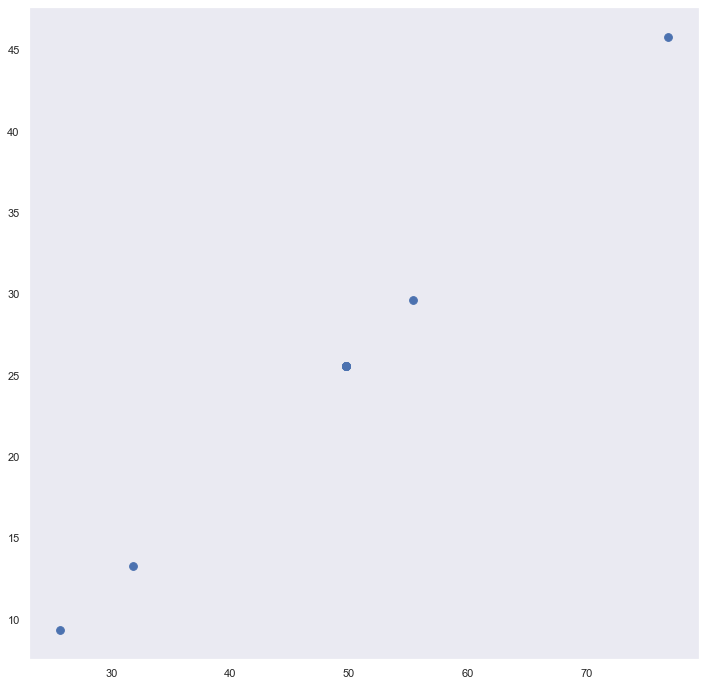

In [46]:
plt.figure(figsize=[12, 12])
sns.set()

history_vals = np.apply_along_axis(schaffer_function, 1, history[:10])
plt.scatter(history_vals[0, :], history_vals[1, :], c="b", s=60)

plt.grid()

In [ ]:
for index in range(history_vals.shape[1]):
    # print(f"Sol : {history_vals[:, index]}")
    assign_pareto_strength(history_vals[:, index], history_vals, "min")

In [57]:
history_vals.shape

(2, 10, 1)

In [64]:
population = np.copy(history)

In [68]:
solutions = np.apply_along_axis(schaffer_function, 1, population)
is_non_dominated = np.array([is_non_dominated_solution(solution, solutions, mode="min",) for solution in solutions])
# population[np.where(is_non_dominated == True)]